In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
!git clone https://github.com/wshuyi/demo_traffic_jam_prediction.git

Cloning into 'demo_traffic_jam_prediction'...


In [4]:
from pathlib import Path
data_dir = Path('demo_traffic_jam_prediction')

In [5]:
with open(data_dir / 'data.pickle', 'rb') as f:
    [event_dict, df] = pickle.load(f)

In [6]:
event_dict

{1: 'road closed due to construction',
 2: 'traffic jam',
 3: 'stopped car on the shoulder',
 4: 'road closed',
 5: 'other',
 6: 'object on roadway',
 7: 'major event',
 8: 'pothole',
 9: 'traffic heavier than normal',
 10: 'road construction',
 11: 'fog',
 12: 'accident',
 13: 'slowdown',
 14: 'stopped car',
 15: 'small traffic jam',
 16: 'stopped traffic',
 17: 'heavy traffic',
 18: 'minor accident',
 19: 'medium traffic jam',
 20: 'malfunctioning traffic light',
 21: 'missing sign on the shoulder',
 22: 'animal on the shoulder',
 23: 'animal struck',
 24: 'large traffic jam',
 25: 'hazard on the shoulder',
 26: 'hazard on road',
 27: 'ice on roadway',
 28: 'weather hazard',
 29: 'flooding',
 30: 'road closed due to hazard',
 31: 'hail',
 32: 'huge traffic jam'}

In [7]:
df.head(10)

,label,events
0,1,"[traffic heavier than normal, heavy traffic, m..."
1,1,"[traffic jam, road construction, stopped car o..."
2,1,[traffic jam]
3,1,[traffic jam]
4,1,"[traffic jam, traffic jam, traffic jam, traffi..."
5,1,"[stopped car on the shoulder, traffic jam, hea..."
6,1,"[stopped car on the shoulder, traffic jam, hea..."
7,1,"[traffic jam, small traffic jam, traffic jam, ..."
8,1,"[heavy traffic, traffic jam, traffic jam, stop..."
9,1,"[heavy traffic, traffic jam, traffic jam, stop..."


In [8]:
df.tail(10)

,label,events
851,0,"[traffic jam, traffic jam, traffic jam]"
852,0,"[stopped traffic, traffic jam, stopped traffic]"
853,0,"[stopped car on the shoulder, stopped traffic,..."
854,0,[stopped traffic]
855,0,"[stopped car on the shoulder, stopped car on t..."
856,0,"[heavy traffic, heavy traffic, heavy traffic, ..."
857,0,"[traffic jam, traffic jam]"
858,0,"[traffic jam, traffic jam, traffic heavier tha..."
859,0,"[heavy traffic, stopped car on the shoulder, t..."
860,0,"[heavy traffic, stopped car on the shoulder, s..."


In [9]:
max_len_event_id = df.events.apply(len).idxmax()
max_len_event_id

105

In [10]:
max_len_event = df.iloc[max_len_event_id]
max_len_event.events

['stopped car on the shoulder',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'slowdown',
 'stopped traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'stopped car on the shoulder',
 'traffic jam',
 'heavy traffic',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'traffic jam',
 'stopped car on the shoulder',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'heavy traffic',
 'stopped traffic',
 'traffic heavier than normal',
 'pothole',
 'stopped car on the shoulder',
 'traffic jam',
 'slowdown',
 'stopped traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'traffic jam',
 'traffic jam',
 'stopped car on the shoulder',
 'major event',
 'traffic jam',
 'traffic jam',
 'stopped traffic',
 'heavy traffic',
 'traffic heavie

In [11]:
maxlen = len(max_len_event.events)
maxlen

84

In [12]:
reversed_dict = {}
for k, v in event_dict.items():
  reversed_dict[v] = k

In [13]:
reversed_dict

{'road closed due to construction': 1,
 'traffic jam': 2,
 'stopped car on the shoulder': 3,
 'road closed': 4,
 'other': 5,
 'object on roadway': 6,
 'major event': 7,
 'pothole': 8,
 'traffic heavier than normal': 9,
 'road construction': 10,
 'fog': 11,
 'accident': 12,
 'slowdown': 13,
 'stopped car': 14,
 'small traffic jam': 15,
 'stopped traffic': 16,
 'heavy traffic': 17,
 'minor accident': 18,
 'medium traffic jam': 19,
 'malfunctioning traffic light': 20,
 'missing sign on the shoulder': 21,
 'animal on the shoulder': 22,
 'animal struck': 23,
 'large traffic jam': 24,
 'hazard on the shoulder': 25,
 'hazard on road': 26,
 'ice on roadway': 27,
 'weather hazard': 28,
 'flooding': 29,
 'road closed due to hazard': 30,
 'hail': 31,
 'huge traffic jam': 32}

In [14]:
def map_event_list_to_idxs(event_list):
  list_idxs = []
  for event in (event_list):
    idx = reversed_dict[event]
    list_idxs.append(idx)
  return list_idxs

In [15]:
map_event_list_to_idxs(max_len_event.events)

[3,
 17,
 17,
 17,
 13,
 16,
 17,
 17,
 17,
 17,
 9,
 3,
 2,
 17,
 16,
 16,
 16,
 17,
 2,
 3,
 16,
 16,
 16,
 17,
 9,
 9,
 9,
 9,
 17,
 16,
 9,
 8,
 3,
 2,
 13,
 16,
 17,
 9,
 2,
 2,
 3,
 7,
 2,
 2,
 16,
 17,
 9,
 3,
 13,
 17,
 17,
 3,
 2,
 13,
 13,
 17,
 3,
 17,
 18,
 3,
 17,
 3,
 17,
 16,
 17,
 9,
 17,
 3,
 9,
 16,
 17,
 17,
 17,
 3,
 13,
 16,
 17,
 3,
 9,
 17,
 18,
 7,
 3,
 3]

In [18]:
import numpy as np
# from keras.utils import to_categorical

In [19]:
from keras.preprocessing.sequence import pad_sequences

In [20]:
len(event_dict)

32

In [21]:
df.events.apply(map_event_list_to_idxs)

0      [9, 17, 18, 14, 13, 17, 3, 13, 16, 3, 17, 17, ...
1                                             [2, 10, 3]
2                                                    [2]
3                                                    [2]
4                               [2, 2, 2, 2, 2, 2, 2, 9]
                             ...                        
856                    [17, 17, 17, 2, 3, 2, 2, 2, 2, 2]
857                                               [2, 2]
858                                  [2, 2, 9, 17, 2, 2]
859                            [17, 3, 2, 2, 2, 2, 2, 2]
860    [17, 3, 3, 17, 3, 17, 2, 3, 18, 14, 3, 3, 16, ...
Name: events, Length: 1722, dtype: object

In [22]:
sequences = df.events.apply(map_event_list_to_idxs).tolist()
sequences[:5]

[[9,
  17,
  18,
  14,
  13,
  17,
  3,
  13,
  16,
  3,
  17,
  17,
  16,
  3,
  16,
  17,
  9,
  17,
  2,
  17,
  2,
  7,
  16,
  17,
  17,
  17,
  17,
  13,
  5,
  17,
  9,
  9,
  16,
  16,
  3],
 [2, 10, 3],
 [2],
 [2],
 [2, 2, 2, 2, 2, 2, 2, 9]]

In [23]:
len(sequences)

1722

In [24]:
data = pad_sequences(sequences, maxlen=maxlen)
data

array([[ 0,  0,  0, ..., 16, 16,  3],
       [ 0,  0,  0, ...,  2, 10,  3],
       [ 0,  0,  0, ...,  0,  0,  2],
       ...,
       [ 0,  0,  0, ..., 17,  2,  2],
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  3,  3,  2]])

In [25]:
labels = np.array(df.label)

In [26]:
np.random.seed(12)

In [27]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [28]:
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

In [29]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [30]:
X_train

array([[ 0,  0,  0, ..., 15, 15,  3],
       [ 0,  0,  0, ...,  0,  2,  2],
       [ 0,  0,  0, ...,  0,  0, 16],
       ...,
       [ 0,  0,  0, ...,  2, 15, 16],
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  0,  0,  2]])

In [31]:
num_events = len(event_dict) + 1

In [32]:
embedding_dim = 20

In [33]:
embedding_matrix = np.random.rand(num_events, embedding_dim)

In [34]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [36]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_untrainable.h5")

Epoch 1/50
44/44 [==============================] - 11s 78ms/step - loss: 0.6872 - acc: 0.5541 - val_loss: 0.6814 - val_acc: 0.5130
Epoch 2/50
44/44 [==============================] - 1s 21ms/step - loss: 0.6571 - acc: 0.6049 - val_loss: 0.6858 - val_acc: 0.5536
Epoch 3/50
44/44 [==============================] - 1s 22ms/step - loss: 0.6356 - acc: 0.6442 - val_loss: 0.7011 - val_acc: 0.5507
Epoch 4/50
44/44 [==============================] - 1s 20ms/step - loss: 0.6152 - acc: 0.6645 - val_loss: 0.6467 - val_acc: 0.5884
Epoch 5/50
44/44 [==============================] - 1s 20ms/step - loss: 0.5986 - acc: 0.6703 - val_loss: 0.5947 - val_acc: 0.6609
Epoch 6/50
44/44 [==============================] - 1s 22ms/step - loss: 0.5885 - acc: 0.7095 - val_loss: 0.6406 - val_acc: 0.6145
Epoch 7/50
44/44 [==============================] - 1s 21ms/step - loss: 0.5828 - acc: 0.6964 - val_loss: 0.6036 - val_acc: 0.6551
Epoch 8/50
44/44 [==============================] - 1s 17ms/step - loss: 0.5885 - 

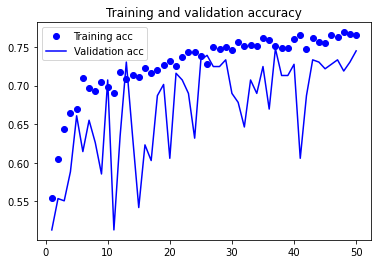

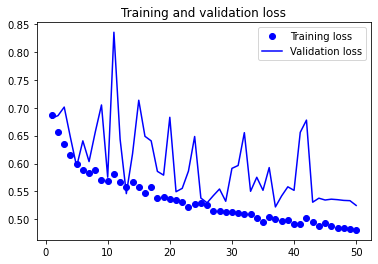

In [37]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [38]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [40]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_trainable.h5")

Epoch 1/50
44/44 [==============================] - 4s 43ms/step - loss: 0.6726 - acc: 0.5940 - val_loss: 0.7014 - val_acc: 0.5304
Epoch 2/50
44/44 [==============================] - 1s 20ms/step - loss: 0.6310 - acc: 0.6659 - val_loss: 0.7315 - val_acc: 0.5478
Epoch 3/50
44/44 [==============================] - 1s 16ms/step - loss: 0.5942 - acc: 0.6899 - val_loss: 0.6946 - val_acc: 0.5797
Epoch 4/50
44/44 [==============================] - 1s 17ms/step - loss: 0.5702 - acc: 0.7015 - val_loss: 0.5757 - val_acc: 0.7014
Epoch 5/50
44/44 [==============================] - 1s 17ms/step - loss: 0.5557 - acc: 0.7182 - val_loss: 0.6156 - val_acc: 0.5797
Epoch 6/50
44/44 [==============================] - 1s 16ms/step - loss: 0.5495 - acc: 0.7190 - val_loss: 0.5947 - val_acc: 0.6696
Epoch 7/50
44/44 [==============================] - 1s 16ms/step - loss: 0.5375 - acc: 0.7269 - val_loss: 0.5427 - val_acc: 0.7304
Epoch 8/50
44/44 [==============================] - 1s 20ms/step - loss: 0.5325 - a

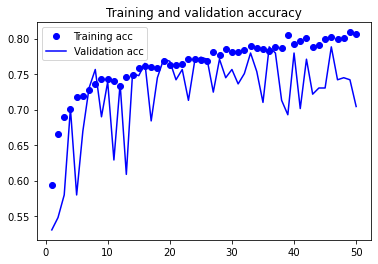

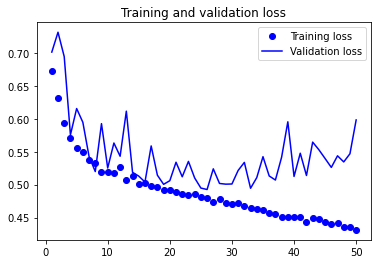

In [41]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [42]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [44]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_trainable_with_dropout.h5")

Epoch 1/50
44/44 [==============================] - 39s 808ms/step - loss: 0.6794 - acc: 0.5788 - val_loss: 0.6884 - val_acc: 0.5333
Epoch 2/50
44/44 [==============================] - 46s 1s/step - loss: 0.6485 - acc: 0.6275 - val_loss: 0.6668 - val_acc: 0.5391
Epoch 3/50
44/44 [==============================] - 37s 849ms/step - loss: 0.6225 - acc: 0.6805 - val_loss: 0.6368 - val_acc: 0.6203
Epoch 4/50
44/44 [==============================] - 34s 769ms/step - loss: 0.5983 - acc: 0.6826 - val_loss: 0.6967 - val_acc: 0.5913
Epoch 5/50
44/44 [==============================] - 35s 809ms/step - loss: 0.5908 - acc: 0.6935 - val_loss: 0.7767 - val_acc: 0.5507
Epoch 6/50
44/44 [==============================] - 34s 765ms/step - loss: 0.5730 - acc: 0.7131 - val_loss: 0.6470 - val_acc: 0.6638
Epoch 7/50
44/44 [==============================] - 32s 731ms/step - loss: 0.5628 - acc: 0.7197 - val_loss: 0.6327 - val_acc: 0.5420
Epoch 8/50
44/44 [==============================] - 37s 852ms/step - los

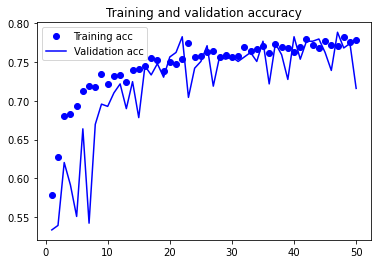

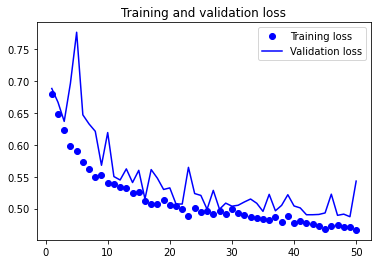

In [45]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()